# View SQL Code of a sql dump

## TL;DR

### This is step X toward the goal of:

- Get Wikipedia categories into database:
- (Create table simply linking page_id and top-level wikipedia category)

### Questions driving exploration:

- After opening this sql command file is it ready to export to postgres?
- What is the schema of enwiki-latest-category.sql?
- What do its records generally look like?

### Answers:

- **Ready to port?**
    - Yes, as far as I can tell.
- **What is the schema?**
    - 1 table
        - category
    - 5 columns
        - cat_id cat_title cat_pages cat_subcats cat_files
    - 2,209,005 rows
- **What do the records look like?**
    - One example
        - (2,'Unprintworthy_redirects',1494044,20,0)

## SQL Code - Explored via Python

### Get SQL into Python

#### Import libraries, check current working directory

In [1]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
home_path = str(Path.home())
os.chdir(home_path + '/git/predwikt/notebooks')

### Check row count, get line lengths

#### Check row count

In [3]:
f = open(
    '../data/raw/enwiki-latest-page.sql', 
    mode='r', 
    encoding='UTF_8', 
    errors='backslashreplace')

row_ct_sqldump = 0
for line in f: 
    row_ct_sqldump+=1
print(row_ct_sqldump)
f.close()

6471


#### Get line lengths

In [4]:
f = open(
    '../data/raw/enwiki-latest-page.sql', 
    mode='r', 
    encoding='UTF_8', 
    errors='backslashreplace')

line_lengths = {}
for i in range(row_ct_sqldump):
    x = f.readline()
    line_lengths[i] = len(x)
f.close()

In [5]:
len(line_lengths)

6471

In [6]:
line_lengths_series = pd.Series(line_lengths, name='line_lengths')

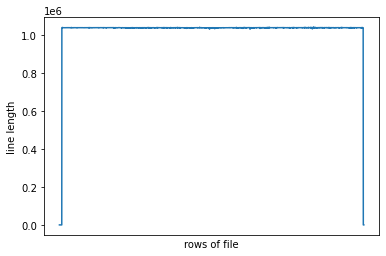

In [7]:
fig = plt.figure()
ax = plt.gca()
line_lengths_series.plot(ax=ax)
ax.set_xticks([])
ax.set_xlabel('rows of file')
ax.set_ylabel('line length')
plt.show()

In [8]:
# for i in range(row_ct_sqldump-1, 0, -1):
#     if line_lengths[i] == 0:
#         line_lengths.pop(i)
#     else:
#         break

#### Populate selected rows into a list of strings

In [9]:
f = open(
    '../data/raw/enwiki-latest-page.sql', 
    mode='r', 
    encoding='UTF_8', 
    errors='backslashreplace')

some_rows_sqldump = []
for i in range(row_ct_sqldump):
    if i < 200:
        some_rows_sqldump.append(f.readline())
    elif i < (row_ct_sqldump-100):
        f.readline()
        some_rows_sqldump.append('')
    else:
        some_rows_sqldump.append(f.readline())

f.close()

#### Get start/end row numbers for headers, data, footers

In [10]:
some_row_lengths =  list(map(len,some_rows_sqldump))

In [11]:
some_row_lengths_series = pd.Series(some_row_lengths, name='line_lengths')

In [24]:
i=0
while some_row_lengths[i] < 10**4:
    i+=1
head_last_rownum = i-1
data_first_rownum = i

In [25]:
i=row_ct_sqldump-99
while some_row_lengths[i] > 10**4:
    i+=1
data_last_rownum = i-1
foot_first_rownum = i

#### Display start/end row numbers

In [27]:
display(0, head_last_rownum, data_first_rownum, data_last_rownum, foot_first_rownum, row_ct_sqldump)

0

50

51

6458

6459

6471

#### Check start/end row numbers for headers, data, footers

In [15]:
some_rows_sqldump[head_last_rownum][:100],'',some_rows_sqldump[data_first_rownum][:300]

('/*!40000 ALTER TABLE `page` DISABLE KEYS */;\n',
 '',
 "INSERT INTO `page` VALUES (10,0,'AccessibleComputing','',1,0,0.33167112649574004,'20211031215759','20210715014751',1002250816,111,'wikitext',NULL),(12,0,'Anarchism','',0,0,0.786172332974311,'20211031050457','20211031050510',1052561385,98889,'wikitext',NULL),(13,0,'AfghanistanHistory','',1,0,0.062150")

In [16]:
some_rows_sqldump[data_last_rownum][:300],'',some_rows_sqldump[foot_first_rownum][:100]

("INSERT INTO `page` VALUES (69163158,3,'Amanimohammed13/talk_page_tutorial','',0,0,0.460524899207,'20211031231421','20211031231421',1052934650,748,'wikitext',NULL),(69163159,118,'Traveler_Mijan','',0,0,0.101748802944,'20211031233151','20211031233149',1052936470,436,'wikitext',NULL),(69163160,3,'172.5",
 '',
 '/*!40000 ALTER TABLE `page` ENABLE KEYS */;\n')

### Plot "some_row_lengths"

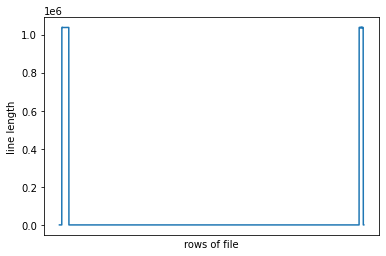

In [12]:
fig = plt.figure()
ax = plt.gca()
some_row_lengths_series.plot(ax=ax)
ax.set_xticks([])
ax.set_xlabel('rows of file')
ax.set_ylabel('line length')
plt.show()

### Peek at SQsome_rows_sqldump code using Python

#### Print headers

In [17]:
for i in range(0,head_last_rownum+1):
    print(some_rows_sqldump[i])

-- MySQL dump 10.19  Distrib 10.3.29-MariaDB, for debian-linux-gnu (x86_64)

--

-- Host: 10.64.48.13    Database: enwiki

-- ------------------------------------------------------

-- Server version	10.4.21-MariaDB-log



/*!40101 SET @OLD_CHARACTER_SET_CLIENT=@@CHARACTER_SET_CLIENT */;

/*!40101 SET @OLD_CHARACTER_SET_RESULTS=@@CHARACTER_SET_RESULTS */;

/*!40101 SET @OLD_COLLATION_CONNECTION=@@COLLATION_CONNECTION */;

/*!40101 SET NAMES utf8mb4 */;

/*!40103 SET @OLD_TIME_ZONE=@@TIME_ZONE */;

/*!40103 SET TIME_ZONE='+00:00' */;

/*!40014 SET @OLD_UNIQUE_CHECKS=@@UNIQUE_CHECKS, UNIQUE_CHECKS=0 */;

/*!40014 SET @OLD_FOREIGN_KEY_CHECKS=@@FOREIGN_KEY_CHECKS, FOREIGN_KEY_CHECKS=0 */;

/*!40101 SET @OLD_SQL_MODE=@@SQL_MODE, SQL_MODE='NO_AUTO_VALUE_ON_ZERO' */;

/*!40111 SET @OLD_SQL_NOTES=@@SQL_NOTES, SQL_NOTES=0 */;



--

-- Table structure for table `page`

--



DROP TABLE IF EXISTS `page`;

/*!40101 SET @saved_cs_client     = @@character_set_client */;

/*!40101 SET character_set_

#### Print footers

In [ ]:
for i in range(foot_first_rownum,row_ct_sqldump):
    print(some_rows_sqldump[i])

/*!40000 ALTER TABLE `page` ENABLE KEYS */;

/*!40103 SET TIME_ZONE=@OLD_TIME_ZONE */;



/*!40101 SET SQL_MODE=@OLD_SQL_MODE */;

/*!40014 SET FOREIGN_KEY_CHECKS=@OLD_FOREIGN_KEY_CHECKS */;

/*!40014 SET UNIQUE_CHECKS=@OLD_UNIQUE_CHECKS */;

/*!40101 SET CHARACTER_SET_CLIENT=@OLD_CHARACTER_SET_CLIENT */;

/*!40101 SET CHARACTER_SET_RESULTS=@OLD_CHARACTER_SET_RESULTS */;

/*!40101 SET COLLATION_CONNECTION=@OLD_COLLATION_CONNECTION */;

/*!40111 SET SQL_NOTES=@OLD_SQL_NOTES */;



-- Dump completed on 2021-11-01  9:58:22

